# Adding Noise to Perfect Data

### Imports

In [1]:
import random
from typing import List
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation, patches
import numpy as np
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from sklearn import preprocessing
from IPython.display import HTML, Image

matplotlib.rcParams["animation.embed_limit"] = 2**128
matplotlib.rcParams["figure.dpi"] = 300

### Generating Data

In [2]:
from random import randint, shuffle

samples = 1000

def generate_random_values():
    return [randint(0,50) * randint(0,50) for _ in range(samples)]

ms = [2 for _ in range(samples)]
xs = generate_random_values()
cs = [50 for _ in range(samples)]

ys = []
for i in range(samples):
    y = ms[i] * xs[i] + cs[i]
    ys.append(y)
noise = [random.randint(0,100) for _ in range(samples)]

data = {
    "ms": ms,
    "xs": xs,
    "cs": cs,
    "noise": noise, 
    "ys": ys
}

df = pd.DataFrame(data=data)
test = df.head(5)
test

,ms,xs,cs,noise,ys
0,2,240,50,92,530
1,2,312,50,86,674
2,2,1443,50,68,2936
3,2,420,50,11,890
4,2,116,50,65,282


In [3]:
columns = ["ms", "xs", "cs", "noise"]
all_columns = columns + ["ys"]
X_train = df[columns]
y_train = df["ys"]

### Defining Model

In [4]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=4, input_shape=[4]))
model.add(tf.keras.layers.Dense(units=1))
model.summary()
opt = Adam(0.01)
model.compile(optimizer=opt, loss="mean_squared_error")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


### Data Structure to Capture Weights During Trianing

In [5]:
history = {
    "loss": [],
    0: {
        0: [],
        1: [],
        2: [],
        3: []
    },
    1: {
        0: [],
        1: [],
        2: [],
        3: []
    },
    2: {
        0: [],
        1: [],
        2: [],
        3: []
    },
    3: {
        0: [],
        1: [],
        2: [],
        3: []
    }, 
}

### Training Model and Capturing Weights

In [6]:
for epoch in range(1, 501):
    print(f"RUNNING EPOCH {epoch}")
    hist = model.fit(X_train, y_train, epochs=1)
    history["loss"].append(hist.history["loss"])
    all_weights = model.layers[0].get_weights()[0].tolist()
    for weights in range(len(all_weights)):
        for weight in range(len(all_weights[weights])):
            history[weights][weight].append(all_weights[weights][weight])

RUNNING EPOCH 1
32/32 [==============================] - 0s 6ms/step - loss: 3798223.5000
RUNNING EPOCH 2
32/32 [==============================] - 0s 5ms/step - loss: 843672.7500
RUNNING EPOCH 3
32/32 [==============================] - 0s 5ms/step - loss: 30486.3828
RUNNING EPOCH 4
32/32 [==============================] - 0s 5ms/step - loss: 13847.8359
RUNNING EPOCH 5
32/32 [==============================] - 0s 5ms/step - loss: 10035.5166
RUNNING EPOCH 6
32/32 [==============================] - 0s 5ms/step - loss: 7784.4512
RUNNING EPOCH 7
32/32 [==============================] - 0s 5ms/step - loss: 5948.2134
RUNNING EPOCH 8
32/32 [==============================] - 0s 5ms/step - loss: 4446.8657
RUNNING EPOCH 9
32/32 [==============================] - 0s 5ms/step - loss: 3300.0303
RUNNING EPOCH 10
32/32 [==============================] - 0s 5ms/step - loss: 2432.2085
RUNNING EPOCH 11
32/32 [==============================] - 0s 5ms/step - loss: 1806.4380
RUNNING EPOCH 12
32/32 [=========

### Sense Checking Results

In [7]:
test["result"] = model.predict(test[columns])
test

1/1 [==============================] - 0s 52ms/step


<ipython-input-7-a54c478e00da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["result"] = model.predict(test[columns])


,ms,xs,cs,noise,ys,result
0,2,240,50,92,530,530.000244
1,2,312,50,86,674,674.000122
2,2,1443,50,68,2936,2935.999756
3,2,420,50,11,890,889.999817
4,2,116,50,65,282,282.000183


### Colours

In [8]:
light = "#90CCF4"
darker = "#5DA2D5"
important = "#F3D250"
noise = "#F78888"
other = "#ECECEC"

### Animated Bar Graph

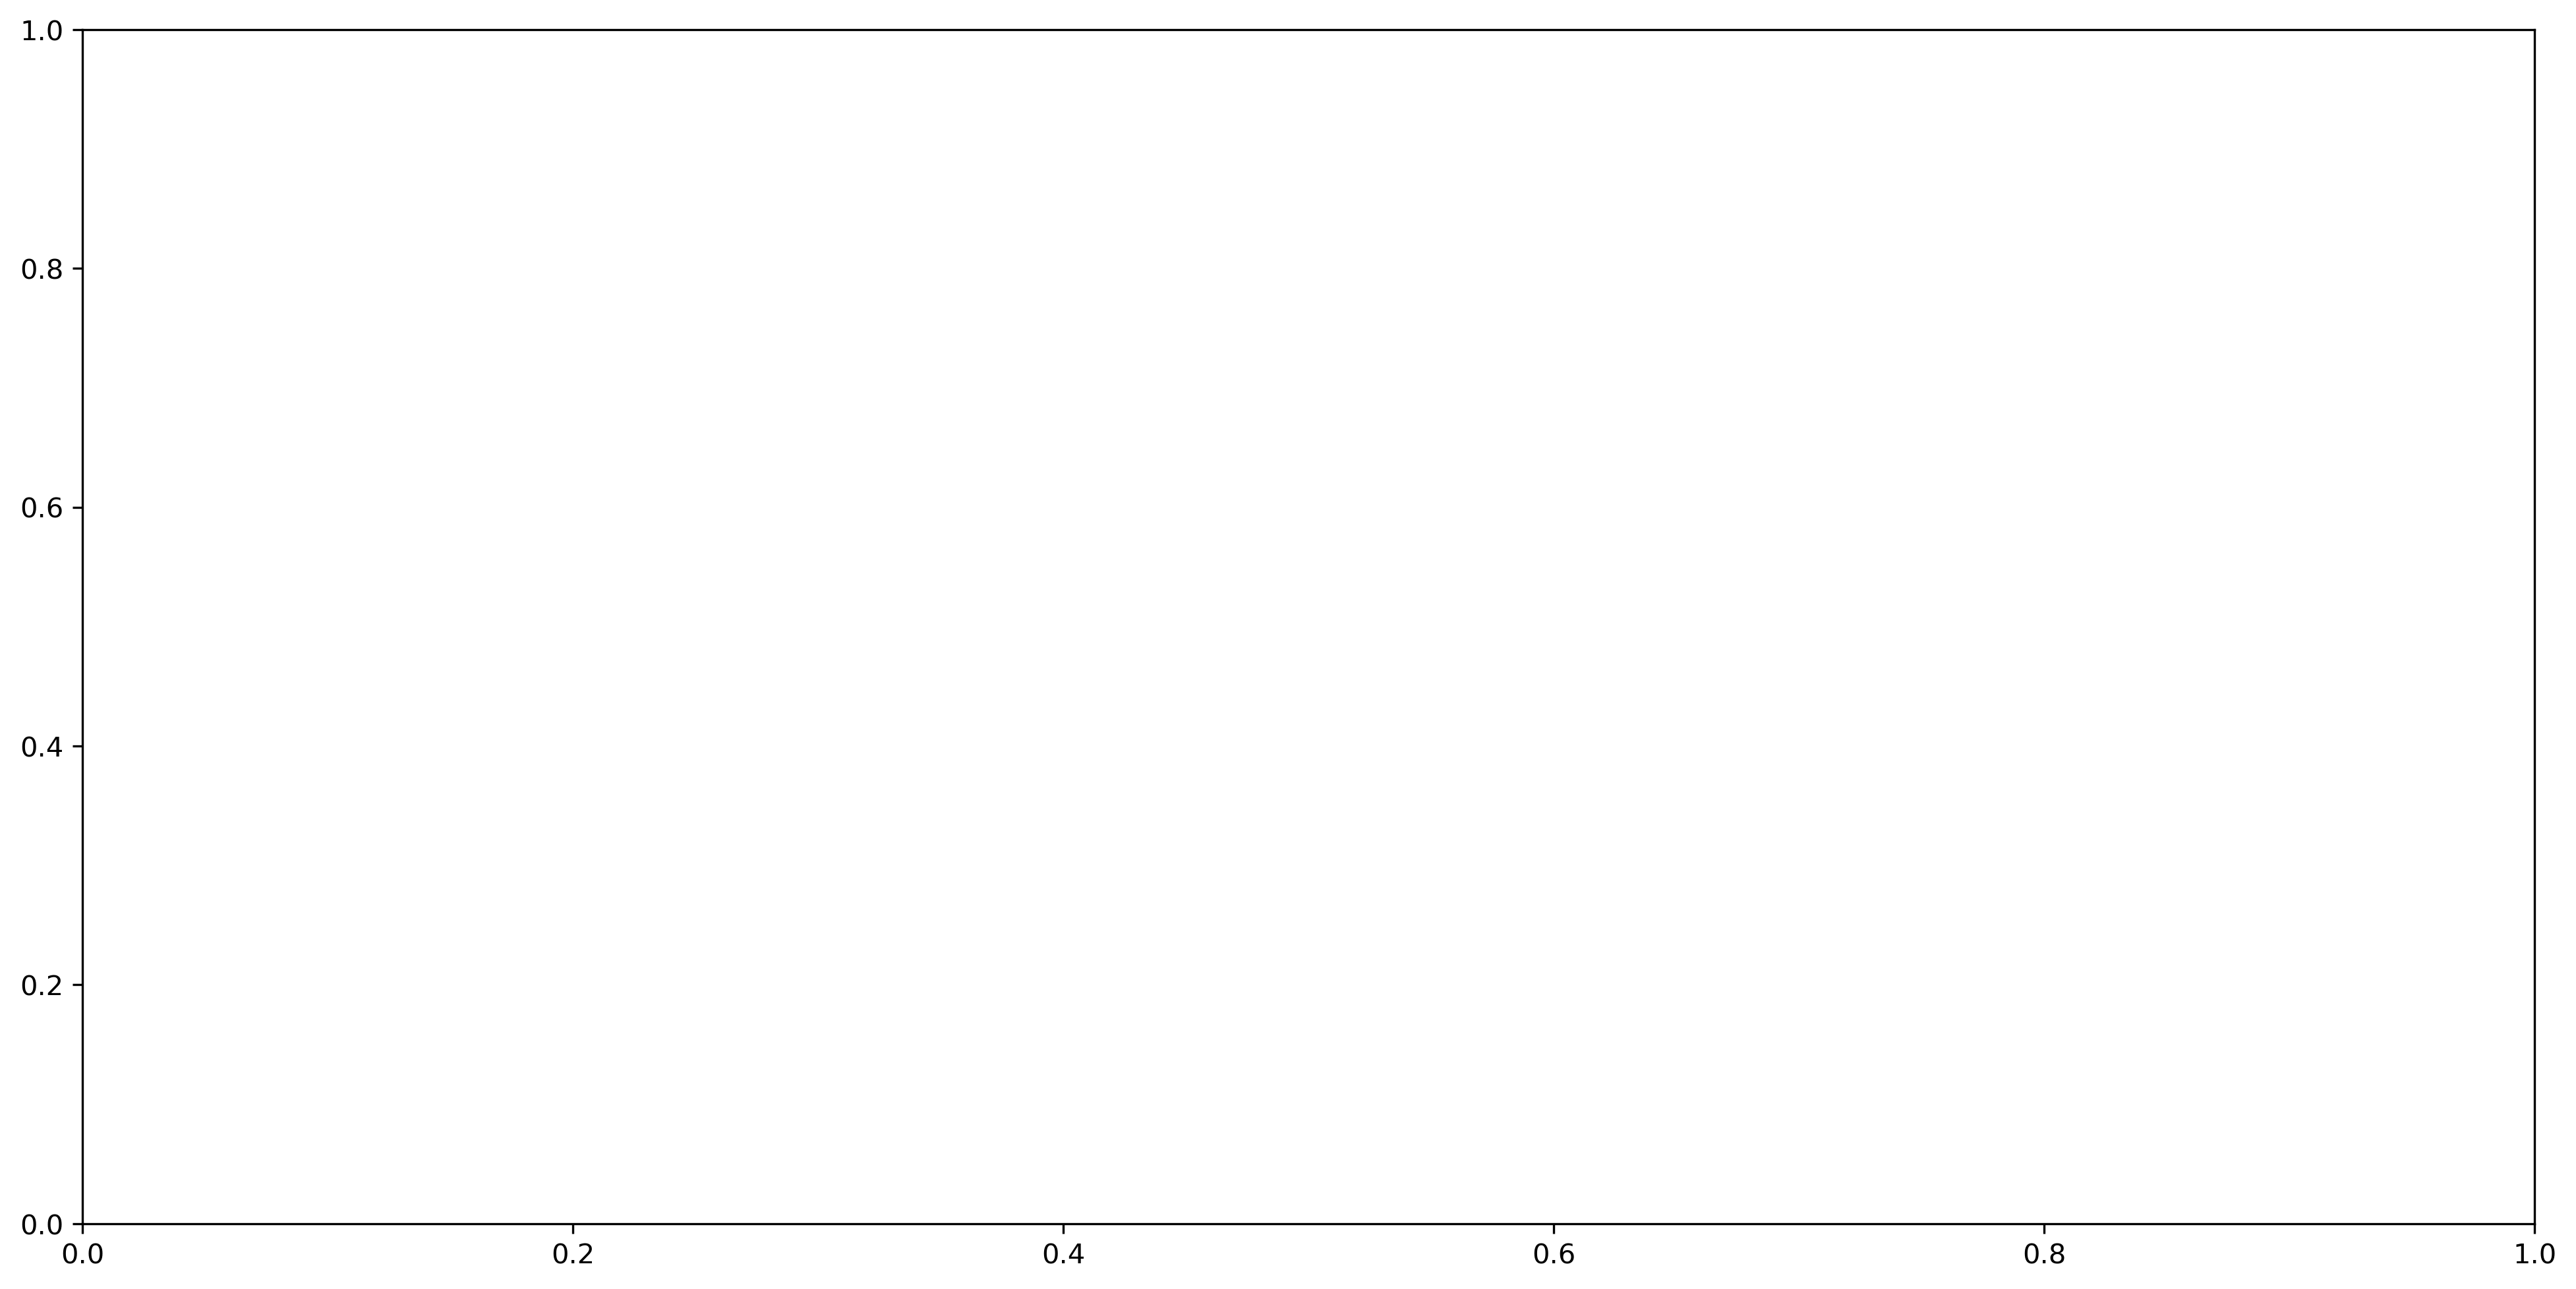

In [9]:
frames = 500
fig, ax = plt.subplots(figsize=(16,8))
def run(i):
  ax.cla()
  ax.set_xlabel("Input Column and Node Number")
  ax.set_ylabel("Weight")
  ax.set_ylim(-1.5, 1.5)
  m_one = history[0][0][i]
  m_two = history[0][1][i]
  m_three = history[0][2][i]
  m_four = history[0][3][i]
  
  x_one = history[1][0][i]
  x_two = history[1][1][i]
  x_three = history[1][2][i]
  x_four = history[1][3][i]

  c_one = history[2][0][i]
  c_two = history[2][1][i]
  c_three = history[2][2][i]
  c_four = history[2][3][i]

  noise_one = history[3][0][i]
  noise_two = history[3][1][i]
  noise_three = history[3][2][i]
  noise_four = history[3][3][i]
  ax.bar(
    [
      "M1", "M2", "M3", "M4", 
      "X1", "X2", "X3", "X4", 
      "C1", "C2", "C3", "C4", 
      "Noise 1", "Noise 2", "Noise 3", "Noise 4", 
    ],
    [
      m_one, m_two, m_three, m_four,
      x_one, x_two, x_three, x_four,
      c_one, c_two, c_three, c_four,
      noise_two, noise_two, noise_three, noise_four,
    ],
    color=[
      darker, darker, darker, darker,
      important, important, important, important,
      light, light, light, light, 
      noise, noise, noise, noise
    ]
  )



In [10]:
anim = animation.FuncAnimation(fig, run, frames=frames, interval=50)
HTML(anim.to_html5_video())

### Useful Data Set

In [11]:
start_index = 0

m_one = history[0][0][start_index:]
m_two = history[0][1][start_index:]
m_three = history[0][2][start_index:]
m_four = history[0][3][start_index:]

x_one = history[1][0][start_index:]
x_two = history[1][1][start_index:]
x_three = history[1][2][start_index:]
x_four = history[1][3][start_index:]

c_one = history[2][0][start_index:]
c_two = history[2][1][start_index:]
c_three = history[2][2][start_index:]
c_four = history[2][3][start_index:]

noise_one = history[3][0][start_index:]
noise_two = history[3][1][start_index:]
noise_three = history[3][2][start_index:]
noise_four = history[3][3][start_index:]

ms = [m_one, m_two, m_three, m_four]
xs = [x_one, x_two, x_three, x_four]
cs = [c_one, x_two, c_three, c_four]
noises = [noise_one, noise_two, noise_three, noise_four]

### Box Plots

In [12]:
def generate_box_plot(ax, data: List, color: str, label: str, position_offset: int = 0, showfliers: bool = False):
    ax.set_xlabel("Input Column and Node Number")
    ax.set_ylabel("Weight Values")
    color = {"color": color}
    ax.boxplot(
        data,
        positions=[i + position_offset for i in range(1,5)],
        boxprops=color,
        medianprops=color,
        whiskerprops=color,
        capprops=color,
        flierprops={"markeredgecolor": other},
        showfliers=showfliers,
        labels=[f"{label}{i}" for i in range(1,5)]
    )

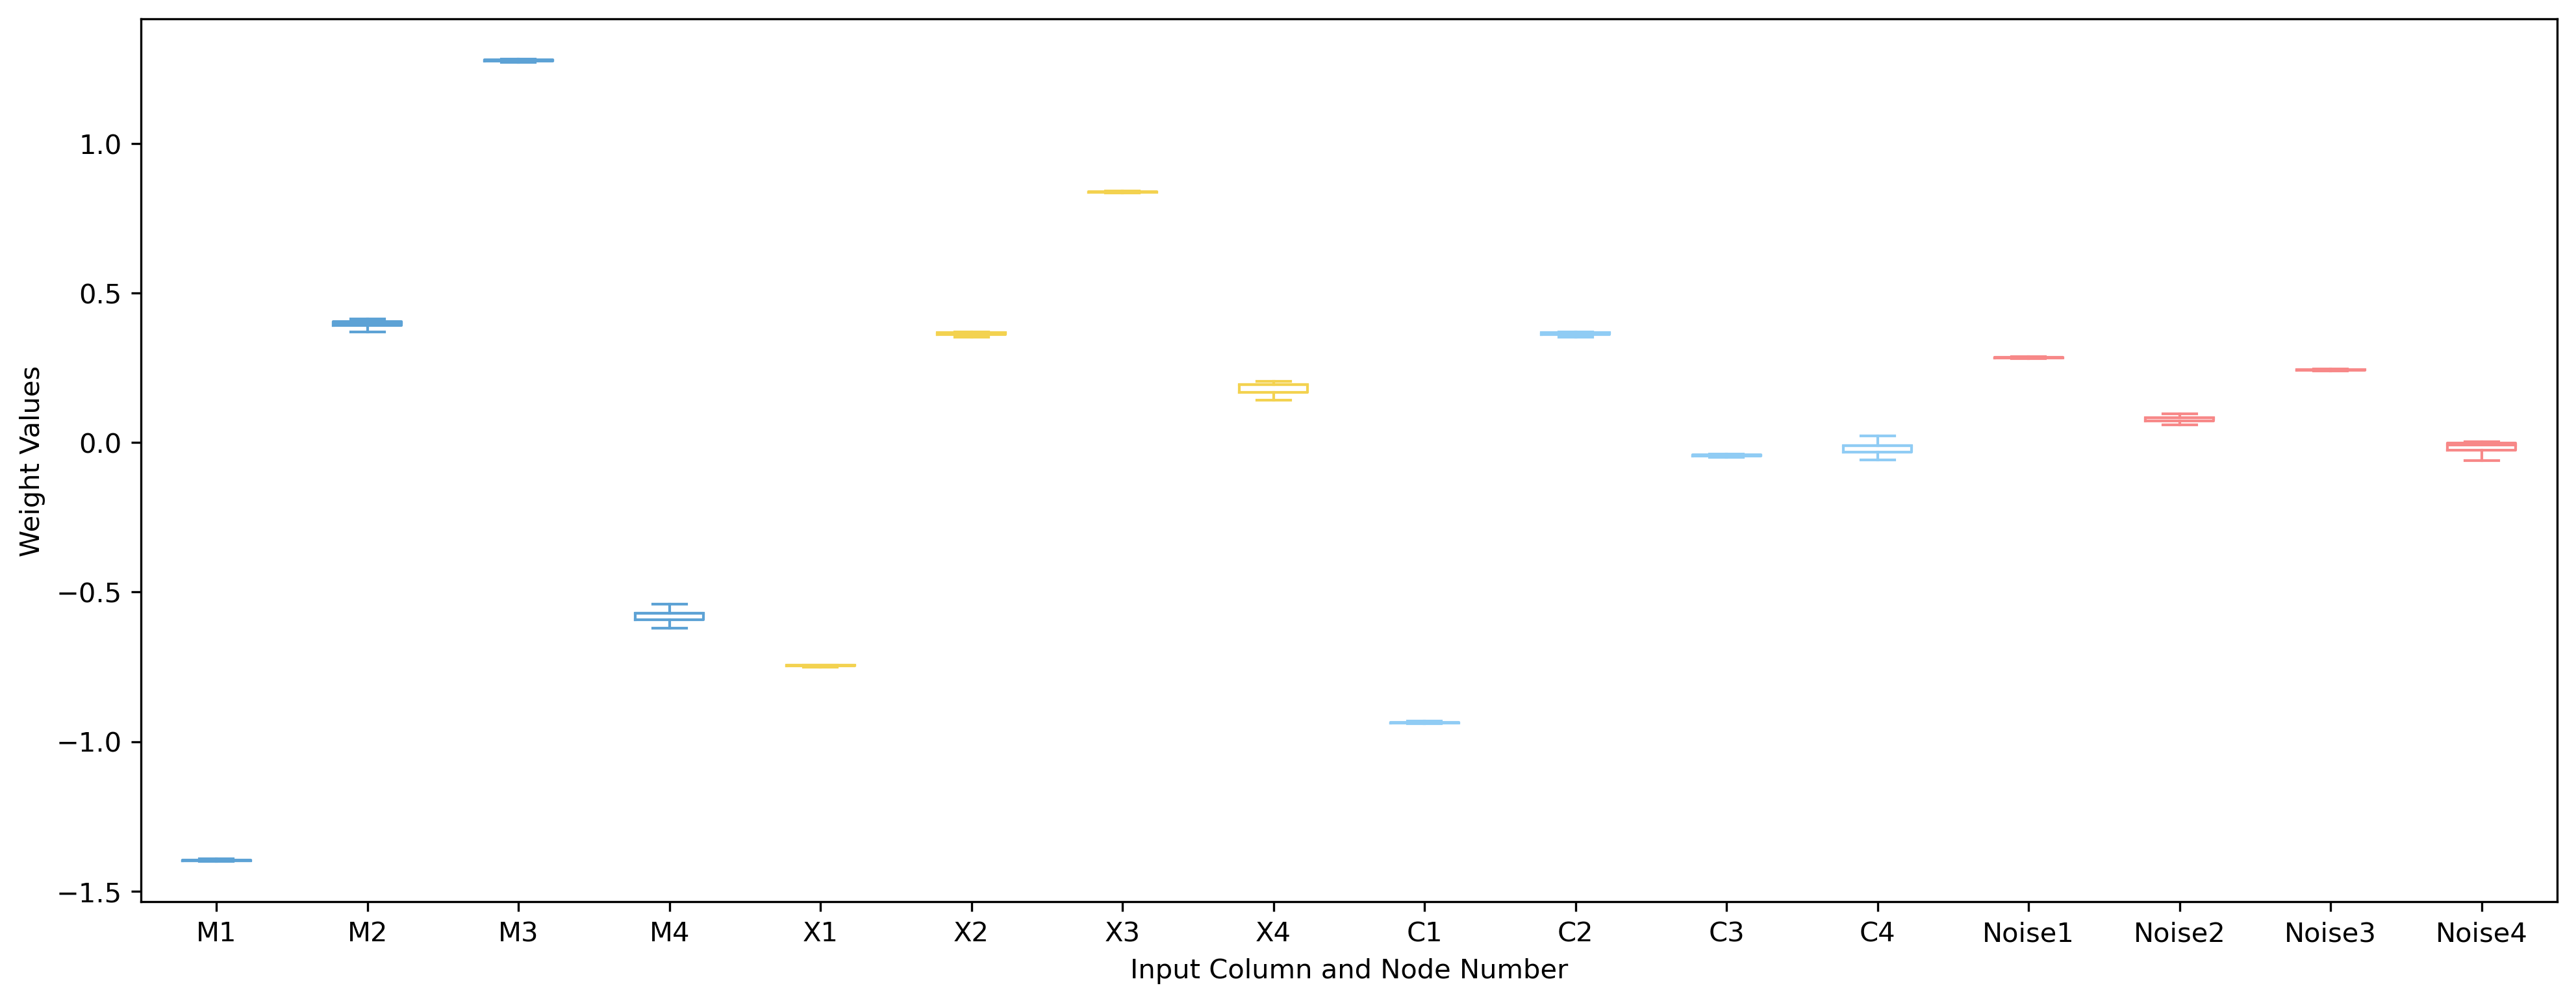

In [13]:
fig, ax = plt.subplots(figsize=(16,6))

generate_box_plot(ax, ms, darker, "M")
generate_box_plot(ax, xs, important, "X", 4)
generate_box_plot(ax, cs, light, "C", 8)
generate_box_plot(ax, noises, noise, "Noise", 12)


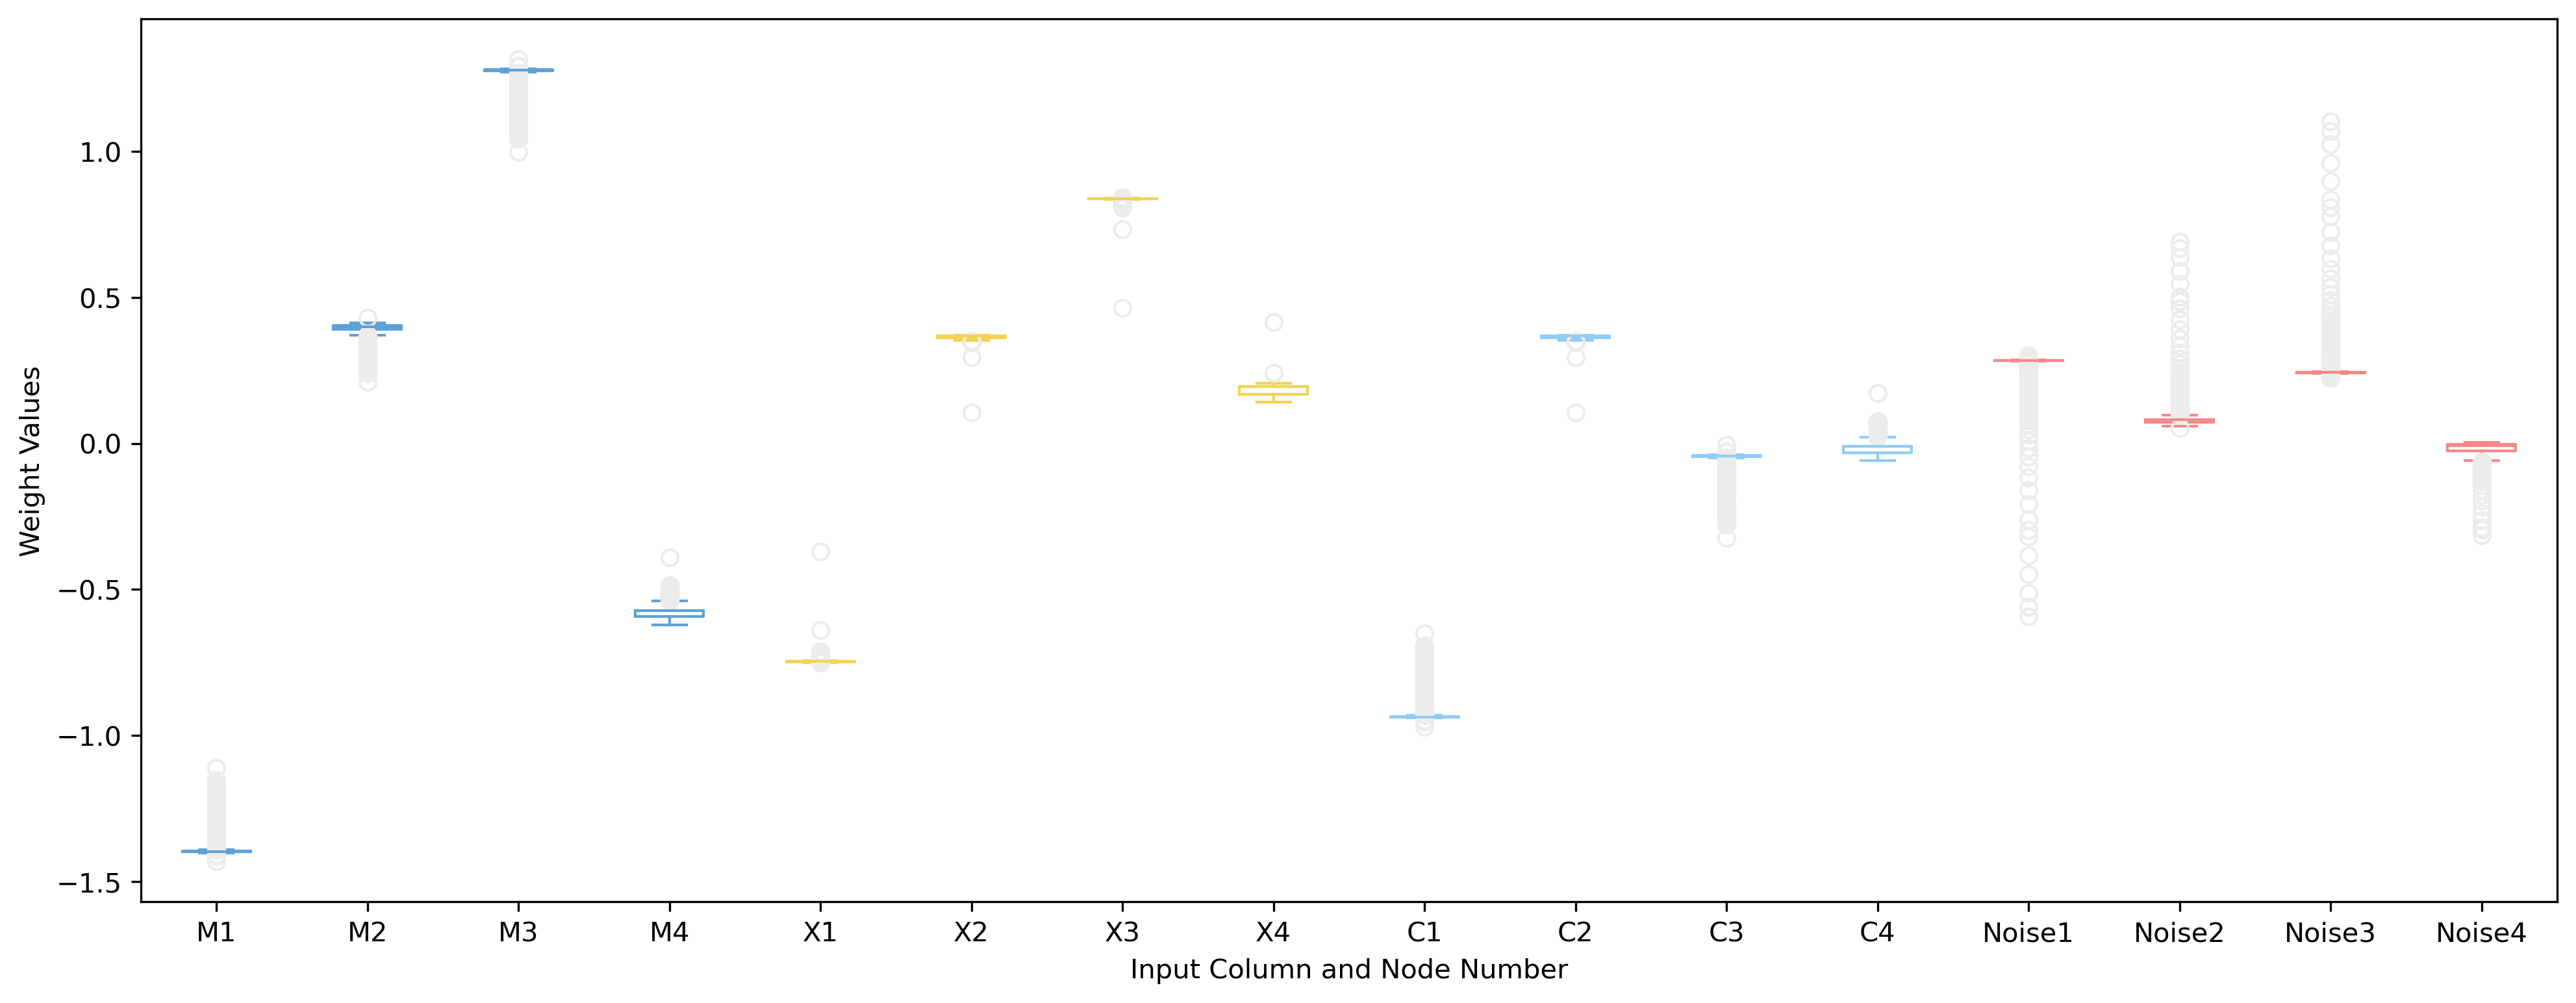

In [14]:
fig, ax = plt.subplots(figsize=(16,6))

generate_box_plot(ax, ms, darker, "M", showfliers=True)
generate_box_plot(ax, xs, important, "X", 4, showfliers=True)
generate_box_plot(ax, cs, light, "C", 8, showfliers=True)
generate_box_plot(ax, noises, noise, "Noise", 12, showfliers=True)

### Standard Deviation Etc.

In [41]:
data = {
    "m_one": m_one,
    "m_two": m_two,
    "m_three": m_three,
    "m_four": m_four,
    "x_one": x_one,
    "x_two": x_two,
    "x_three": x_three,
    "x_four": x_four,
    "c_one": c_one,
    "c_two": c_two,
    "c_three": c_three,
    "c_four": c_four,
    "noise_one": noise_one,
    "noise_two": noise_two,
    "noise_three": noise_three,
    "noise_four": noise_four
}

columns = [
    "m_one",
    "m_two",
    "m_three",
    "m_four",
    "x_one",
    "x_two",
    "x_three",
    "x_four",
    "c_one",
    "c_two",
    "c_three",
    "c_four",
    "noise_one",
    "noise_two",
    "noise_three",
    "noise_four"
]


odf = pd.DataFrame(data)
odf.head(5)

,m_one,m_two,m_three,m_four,x_one,x_two,x_three,x_four,c_one,c_two,c_three,c_four,noise_one,noise_two,noise_three,noise_four
0,-1.111528,0.210134,0.997163,-0.389183,-0.370431,0.105056,0.464655,0.414149,-0.650772,-0.563210,-0.323495,0.172540,-0.297551,0.486751,0.809442,-0.128177
1,-1.378711,0.395815,1.263099,-0.557641,-0.639749,0.295465,0.732722,0.242087,-0.917955,-0.377528,-0.057558,0.004081,-0.558174,0.668897,1.068907,-0.294450
2,-1.432145,0.431250,1.316106,-0.585152,-0.723076,0.352537,0.815163,0.202454,-0.971388,-0.342093,-0.004551,-0.023430,-0.592699,0.691487,1.103299,-0.314718
3,-1.379899,0.395112,1.264778,-0.567061,-0.713182,0.345464,0.805464,0.205598,-0.919141,-0.378232,-0.055879,-0.005339,-0.513362,0.636518,1.025334,-0.286910
4,-1.343975,0.370399,1.229421,-0.554251,-0.719451,0.349852,0.811639,0.203286,-0.883217,-0.402944,-0.091236,0.007471,-0.447699,0.591144,0.960689,-0.263307


In [16]:
m_one_std = odf["m_one"].agg([np.mean, np.std])
m_two_std = odf["m_two"].agg([np.mean, np.std])
m_three_std = odf["m_three"].agg([np.mean, np.std])
m_four_std = odf["m_four"].agg([np.mean, np.std])

noise_one_std = odf["noise_one"].agg([np.mean, np.std])
noise_two_std = odf["noise_two"].agg([np.mean, np.std])
noise_three_std = odf["noise_three"].agg([np.mean, np.std])
noise_four_std = odf["noise_four"].agg([np.mean, np.std])


In [17]:
std_df = odf.std().to_frame()
mean_df = odf.mean().to_frame()
std_df.columns = ["Std"]
mean_df.columns = ["Mean"]
merged_df = pd.merge(std_df, mean_df, left_index=True, right_index=True)

''

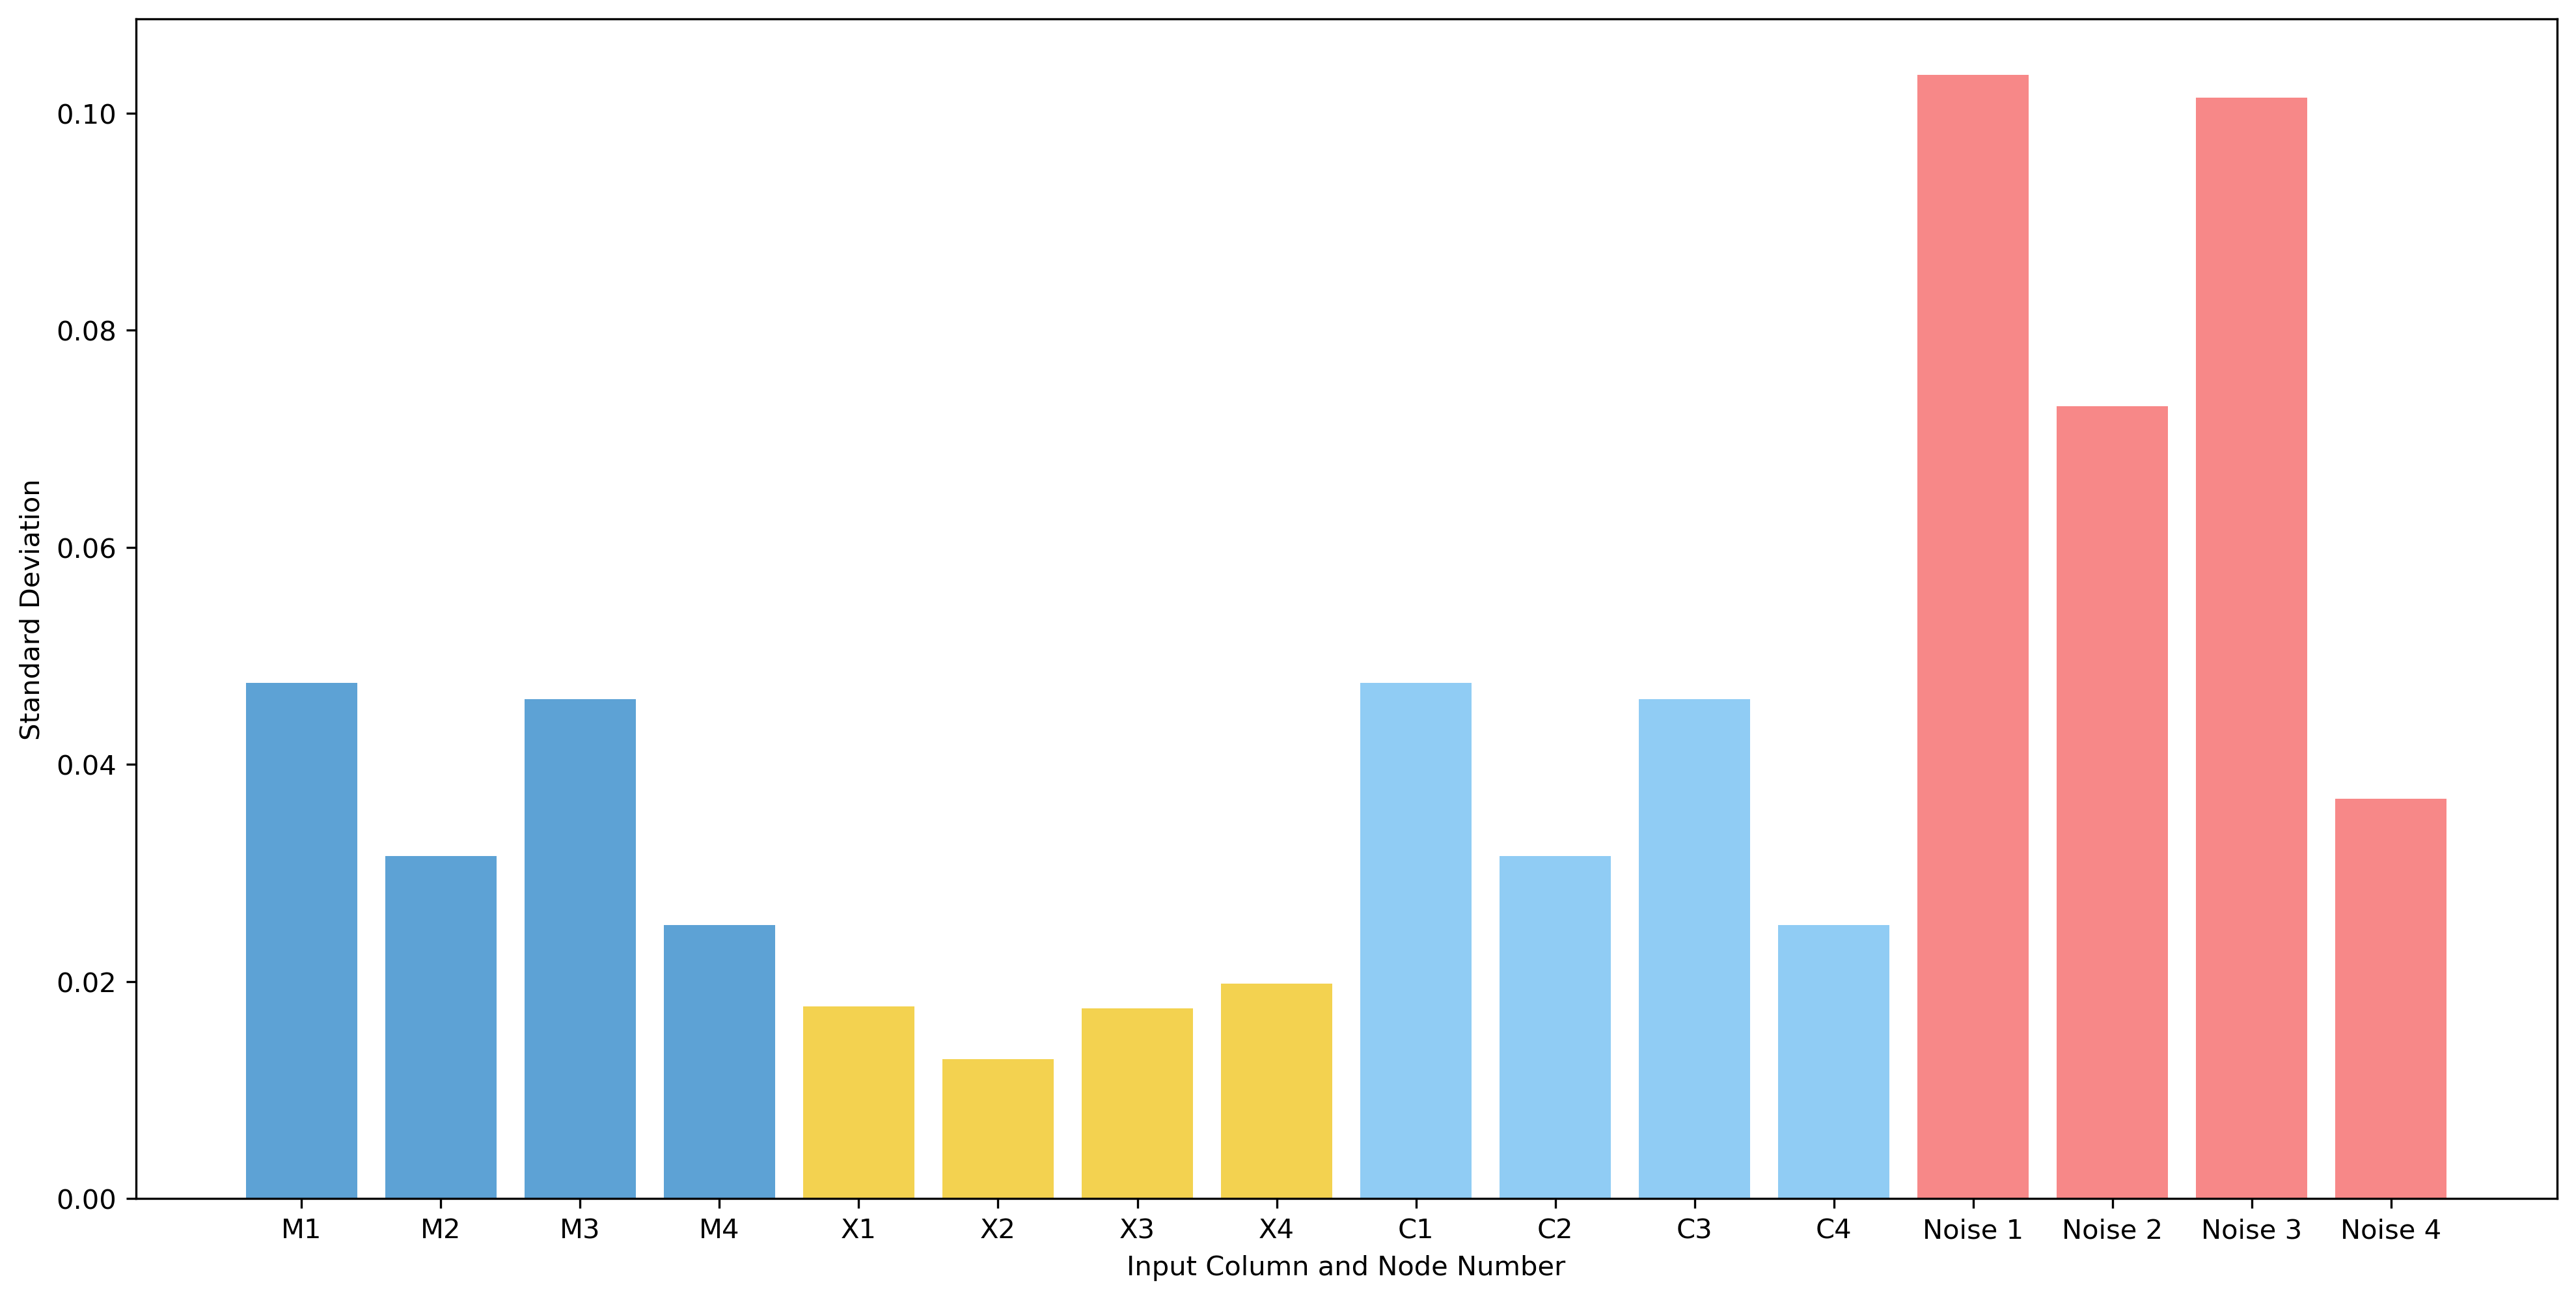

In [18]:
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(
    [
      "M1", "M2", "M3", "M4", 
      "X1", "X2", "X3", "X4", 
      "C1", "C2", "C3", "C4", 
      "Noise 1", "Noise 2", "Noise 3", "Noise 4", 
    ],
    [
      std_df["Std"].loc["m_one"], std_df["Std"].loc["m_two"], std_df["Std"].loc["m_three"], std_df["Std"].loc["m_four"],
      std_df["Std"].loc["x_one"], std_df["Std"].loc["x_two"], std_df["Std"].loc["x_three"], std_df["Std"].loc["x_four"],
      std_df["Std"].loc["c_one"], std_df["Std"].loc["c_two"], std_df["Std"].loc["c_three"], std_df["Std"].loc["c_four"],
      std_df["Std"].loc["noise_one"], std_df["Std"].loc["noise_two"], std_df["Std"].loc["noise_three"], std_df["Std"].loc["noise_four"],
    ],
    color=[
      darker, darker, darker, darker,
      important, important, important, important,
      light, light, light, light,
      noise, noise, noise, noise
    ]
)
ax.set_xlabel("Input Column and Node Number")
ax.set_ylabel("Standard Deviation")
;

In [19]:
g_ms = sum([std_df["Std"].loc["m_one"], std_df["Std"].loc["m_two"], std_df["Std"].loc["m_three"], std_df["Std"].loc["m_four"]])
g_xs = sum([std_df["Std"].loc["x_one"], std_df["Std"].loc["x_two"], std_df["Std"].loc["x_three"], std_df["Std"].loc["x_four"]])
g_cs = sum([std_df["Std"].loc["c_one"], std_df["Std"].loc["c_two"], std_df["Std"].loc["c_three"], std_df["Std"].loc["c_four"]])
g_noises = sum([std_df["Std"].loc["noise_one"], std_df["Std"].loc["noise_two"], std_df["Std"].loc["noise_three"], std_df["Std"].loc["noise_four"]])

''

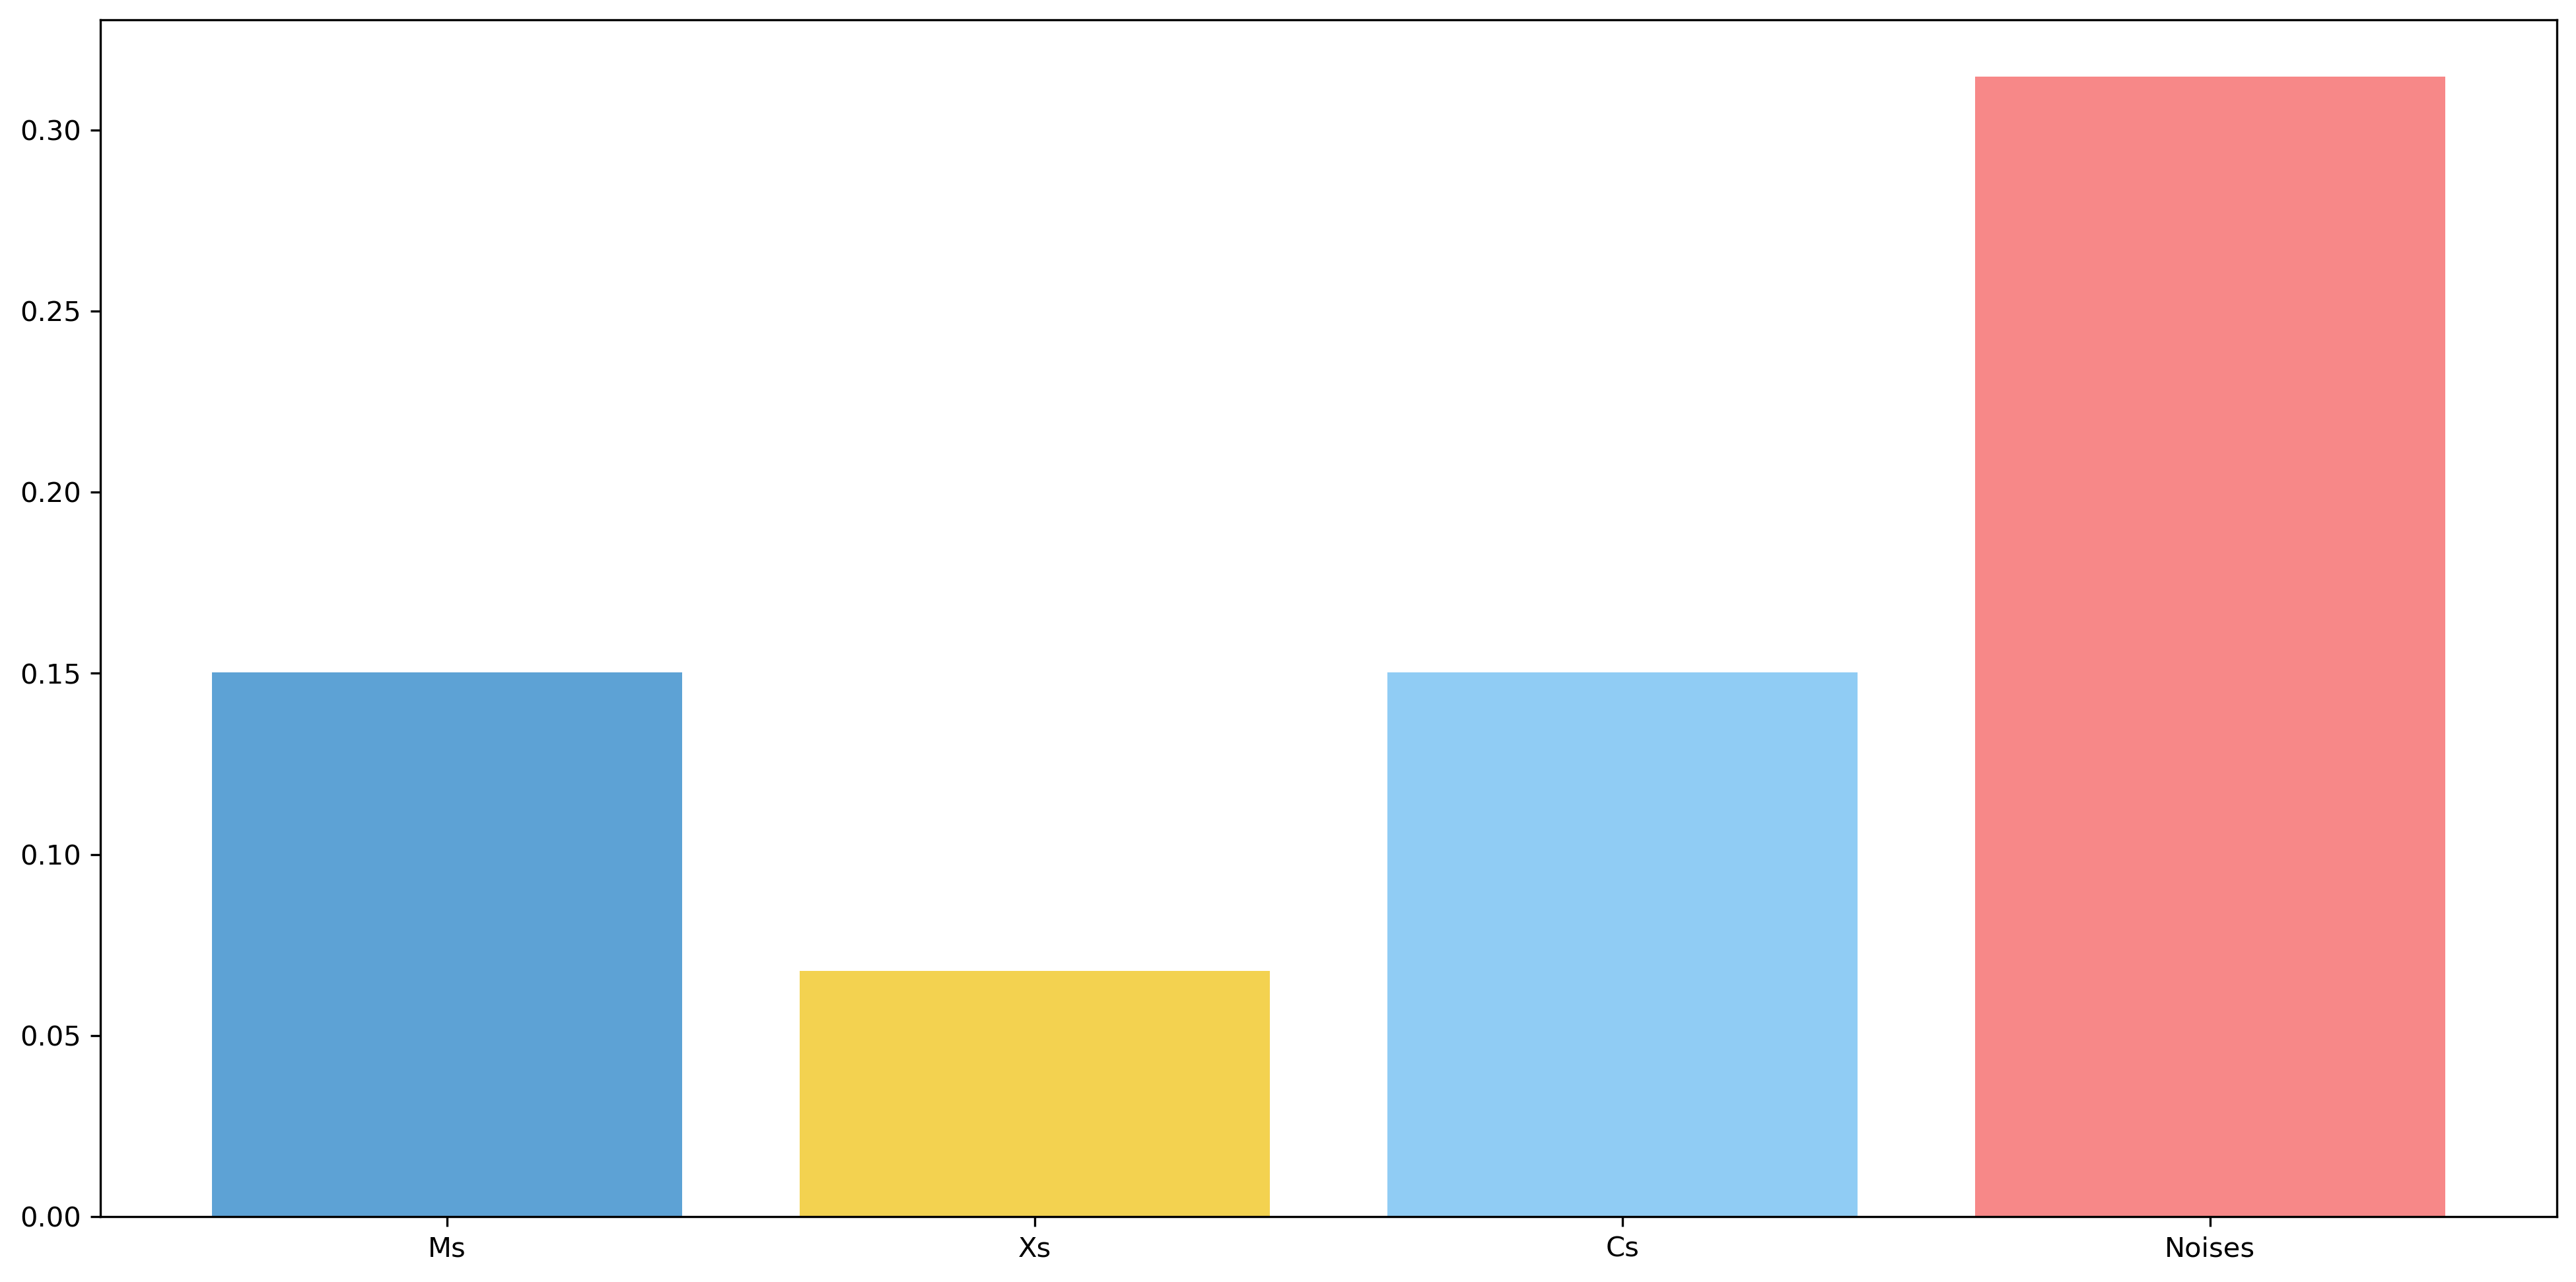

In [20]:
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(
    [
      "Ms", "Xs", "Cs", "Noises"
    ],
    [
      g_ms, g_xs, g_cs, g_noises
    ],
    color=[darker, important, light, noise]
)
;

### Scatter Plots

In [21]:
def prepare_scatter_df(data: List, bin: int, abs: bool = False):
    indices = [i for i in range(len(data))]
    df = pd.DataFrame(indices, columns=["Indices"])
    rdf = pd.DataFrame(data, columns=["Readings"])
    if abs:
        rdf = rdf.explode("Readings", ignore_index=True).abs()
    else:
        rdf = rdf.explode("Readings", ignore_index=True)
    df["Readings"] = rdf["Readings"]
    df["Bin"] = [bin for _ in range(len(data))]
    return df

In [22]:
def call_prepare_scatter_df(data: List, abs: bool = False):
    dfs = []
    for i, item in enumerate(data):
        dfs.append(prepare_scatter_df(item, i, abs))
    return pd.concat(dfs)

In [23]:
def create_scatter(scatter_dfs):
    fig, ax = plt.subplots(figsize=(16,6))
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Weight")
    colormap = np.array([darker, important, light, noise])
    categories = np.array(scatter_dfs["Bin"])
    scatter = ax.scatter(x=scatter_dfs["Indices"], y=scatter_dfs["Readings"], c=colormap[categories], s=[2])

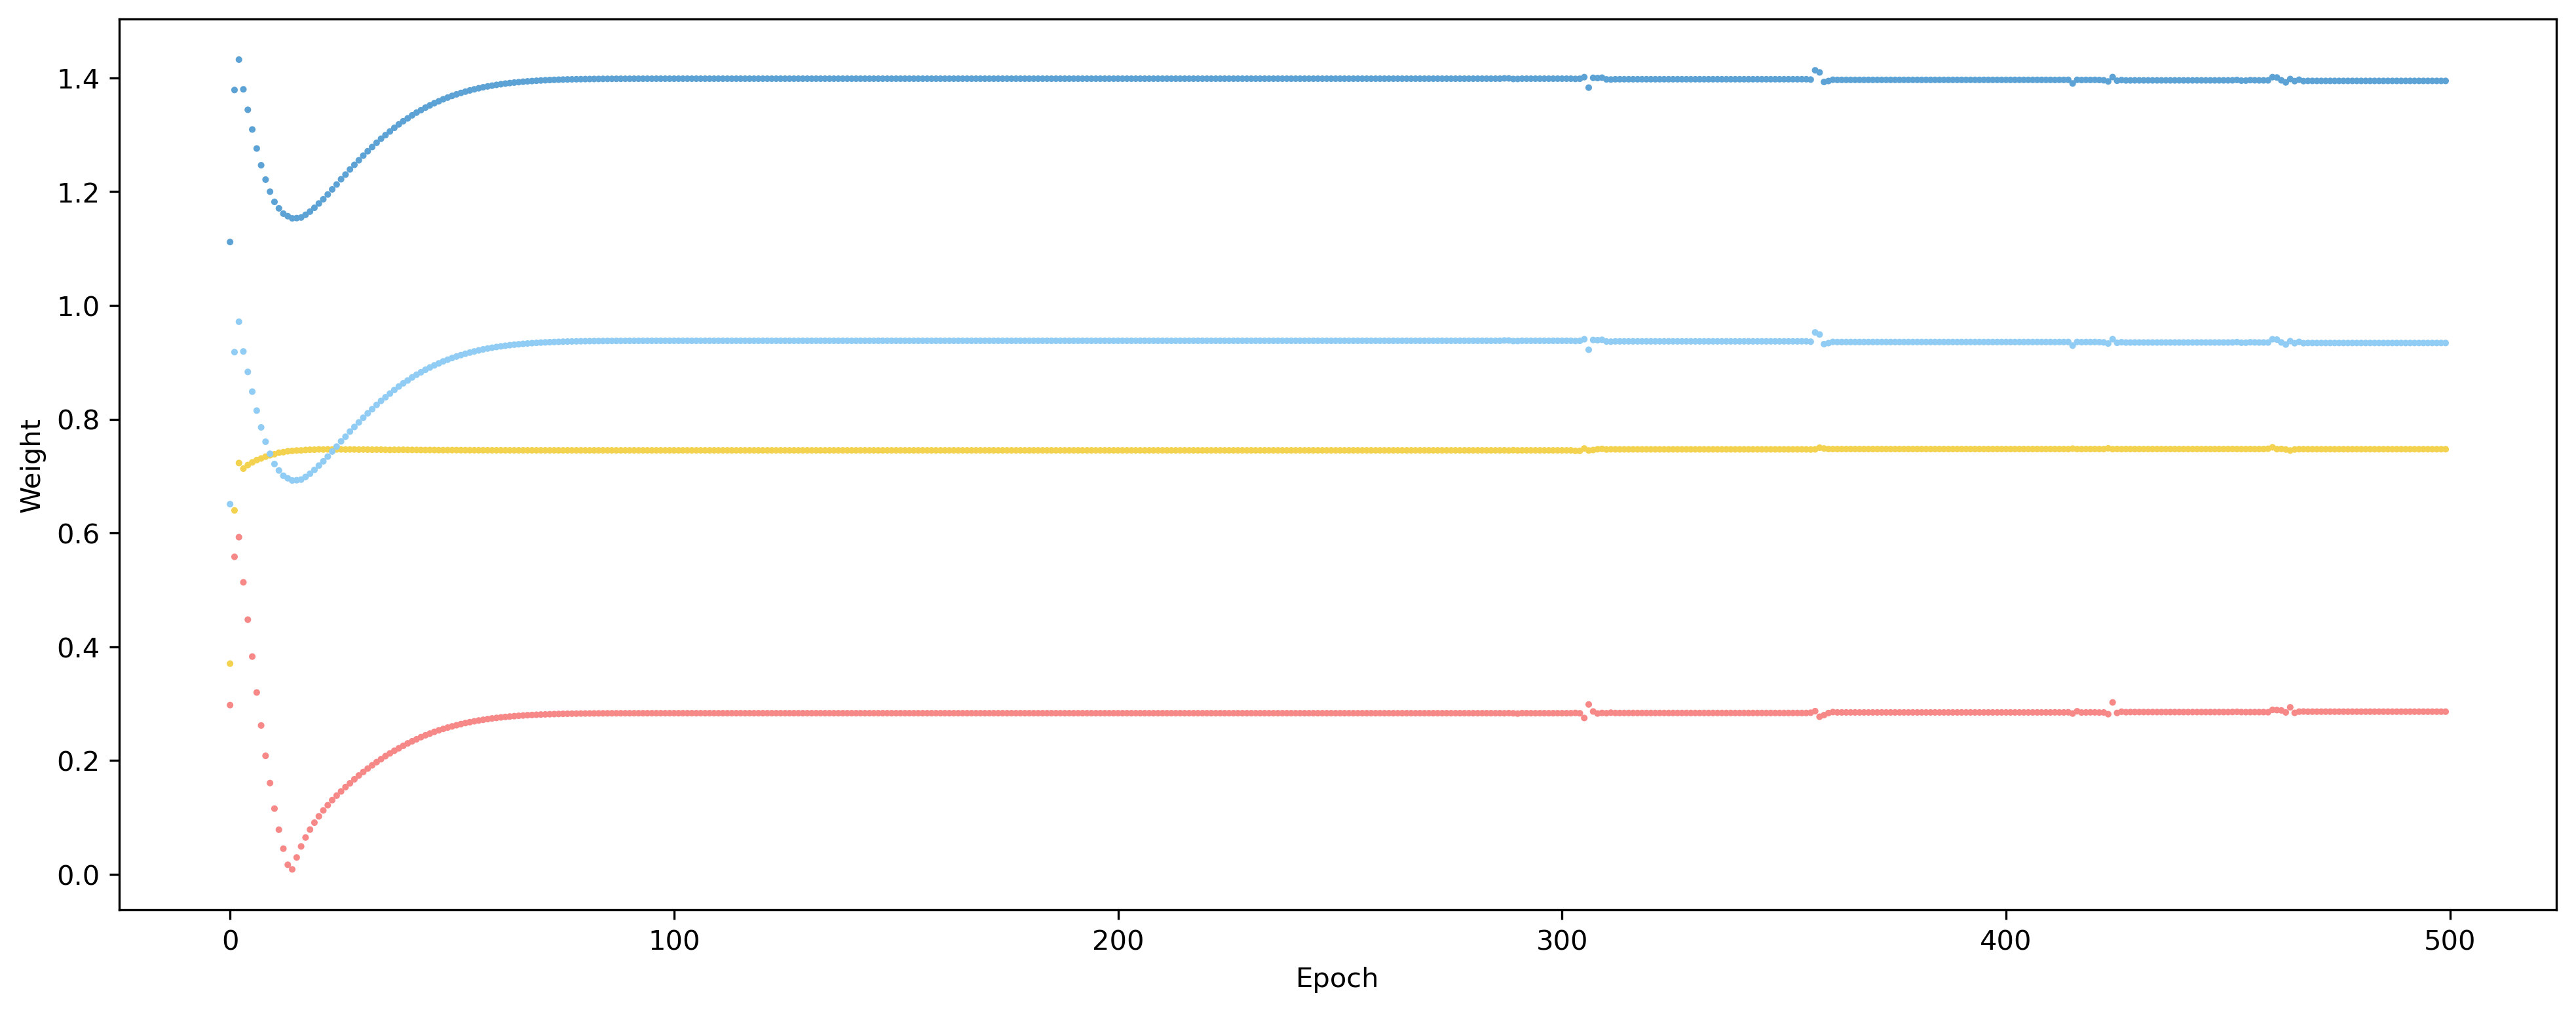

In [49]:
group_ones = [data["m_one"], data["x_one"], data["c_one"], data["noise_one"]]
sdf = call_prepare_scatter_df(group_ones, True)
create_scatter(sdf)

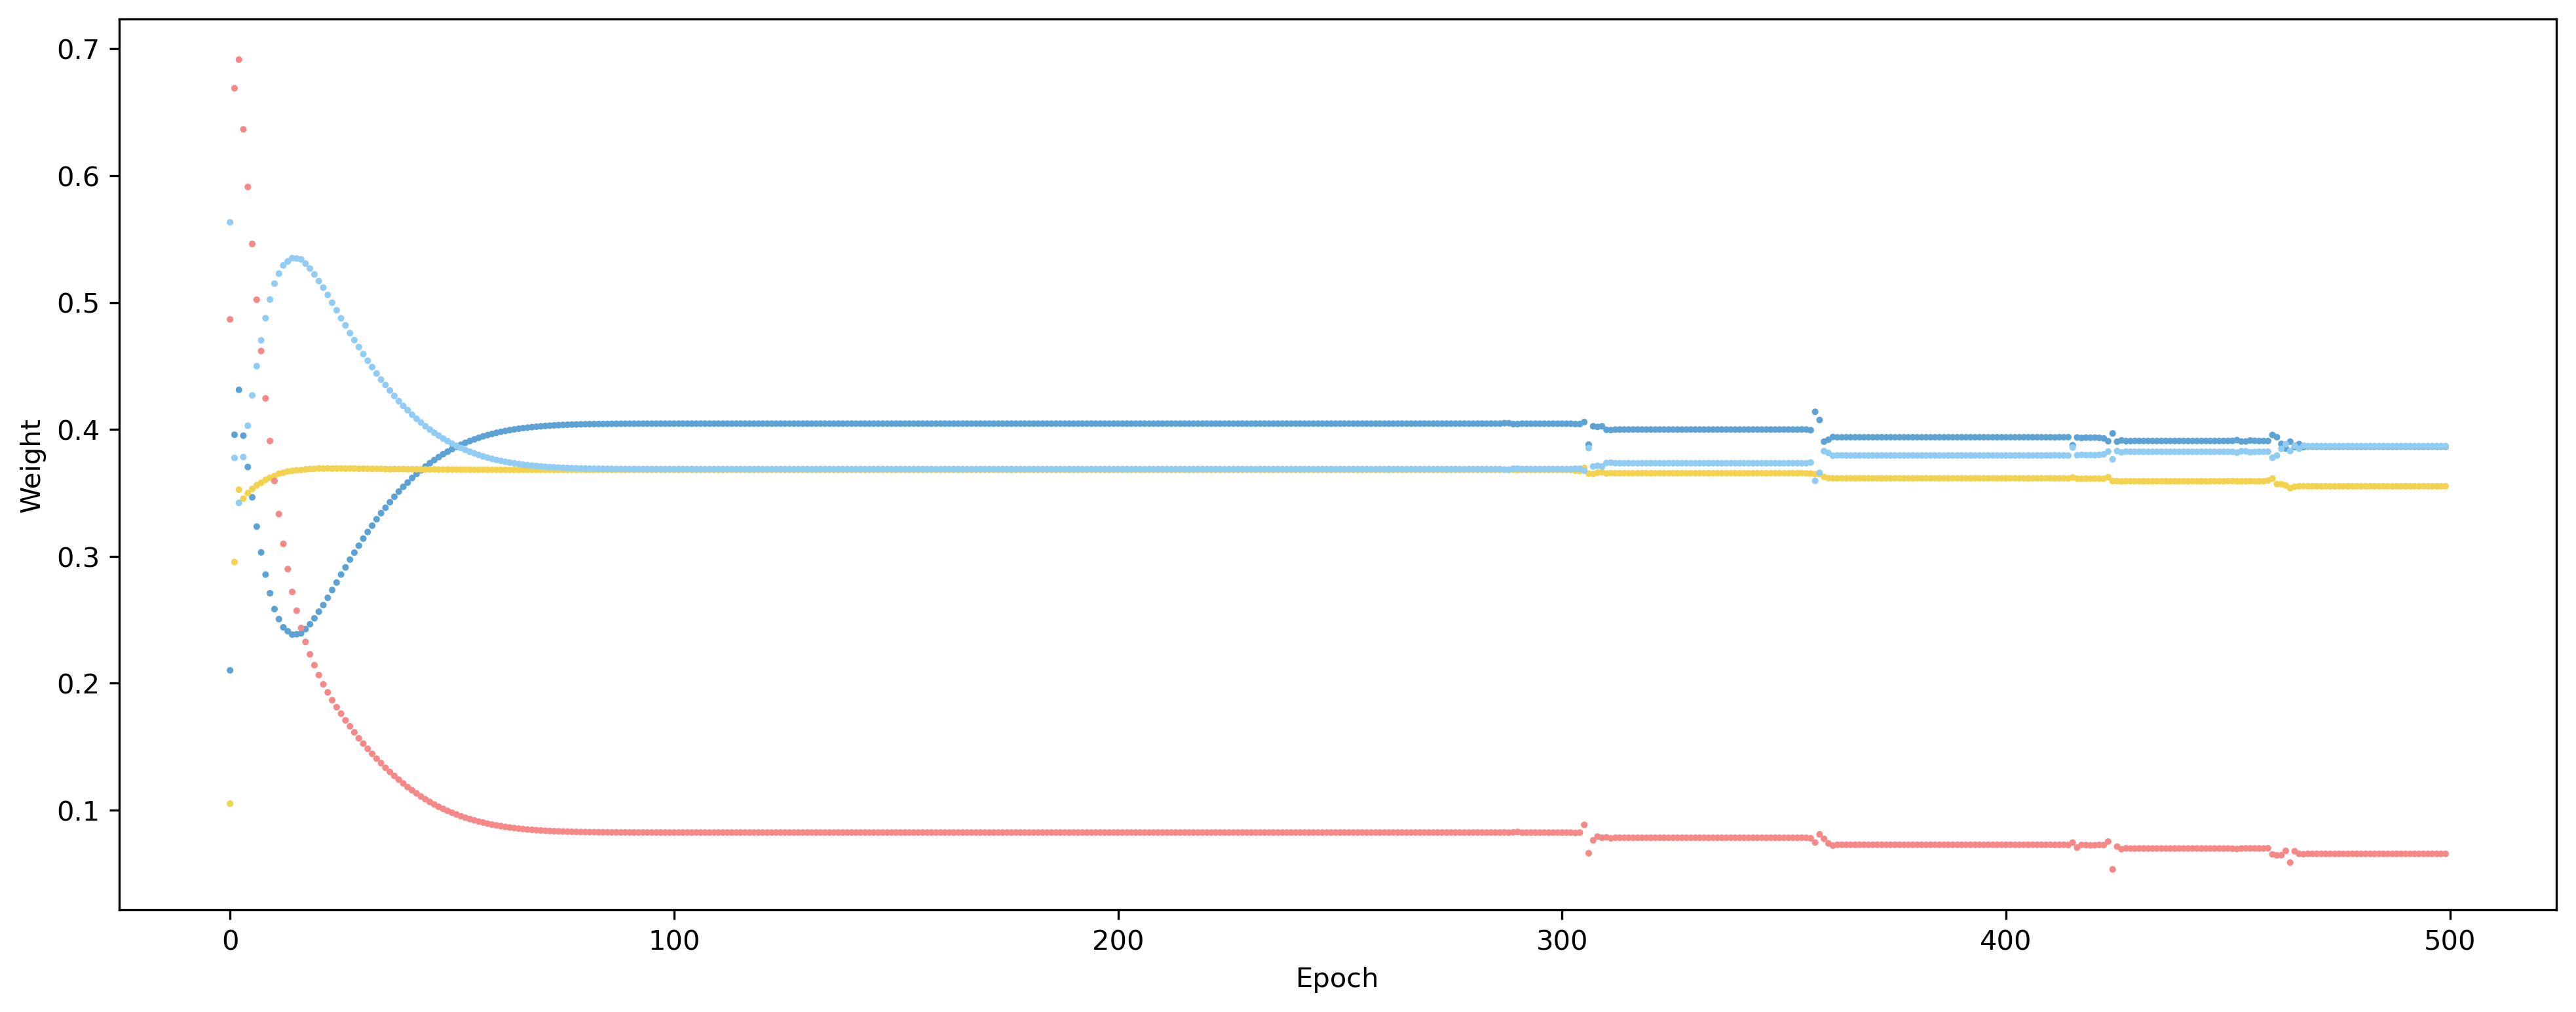

In [48]:
group_twos = [data["m_two"], data["x_two"], data["c_two"], data["noise_two"]]
sdf = call_prepare_scatter_df(group_twos, True)
create_scatter(sdf)

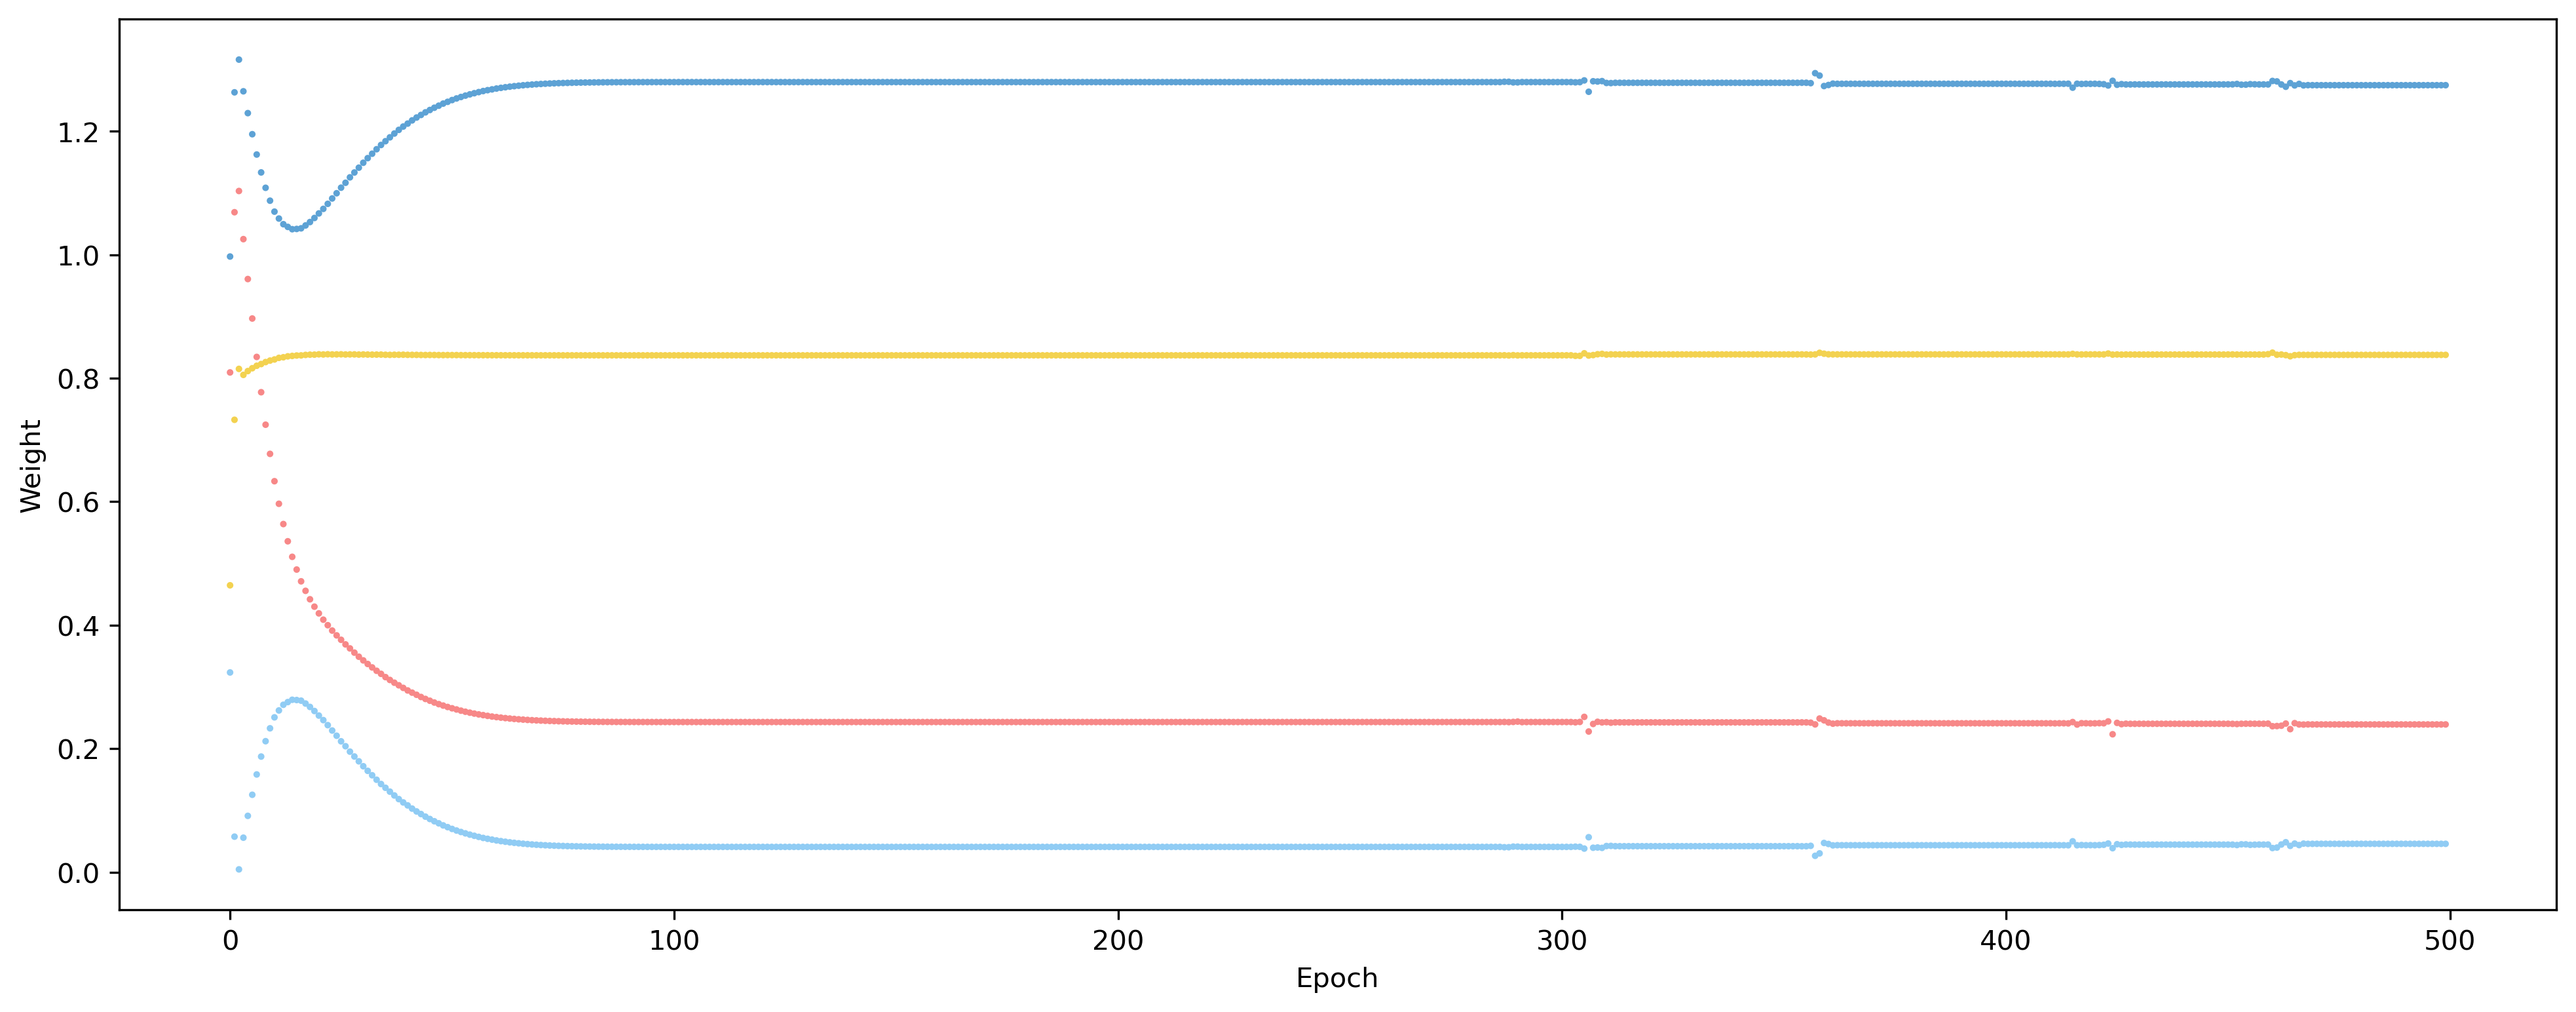

In [54]:
group_threes = [data["m_three"], data["x_three"], data["c_three"], data["noise_three"]]
sdf = call_prepare_scatter_df(group_threes, True)
create_scatter(sdf)

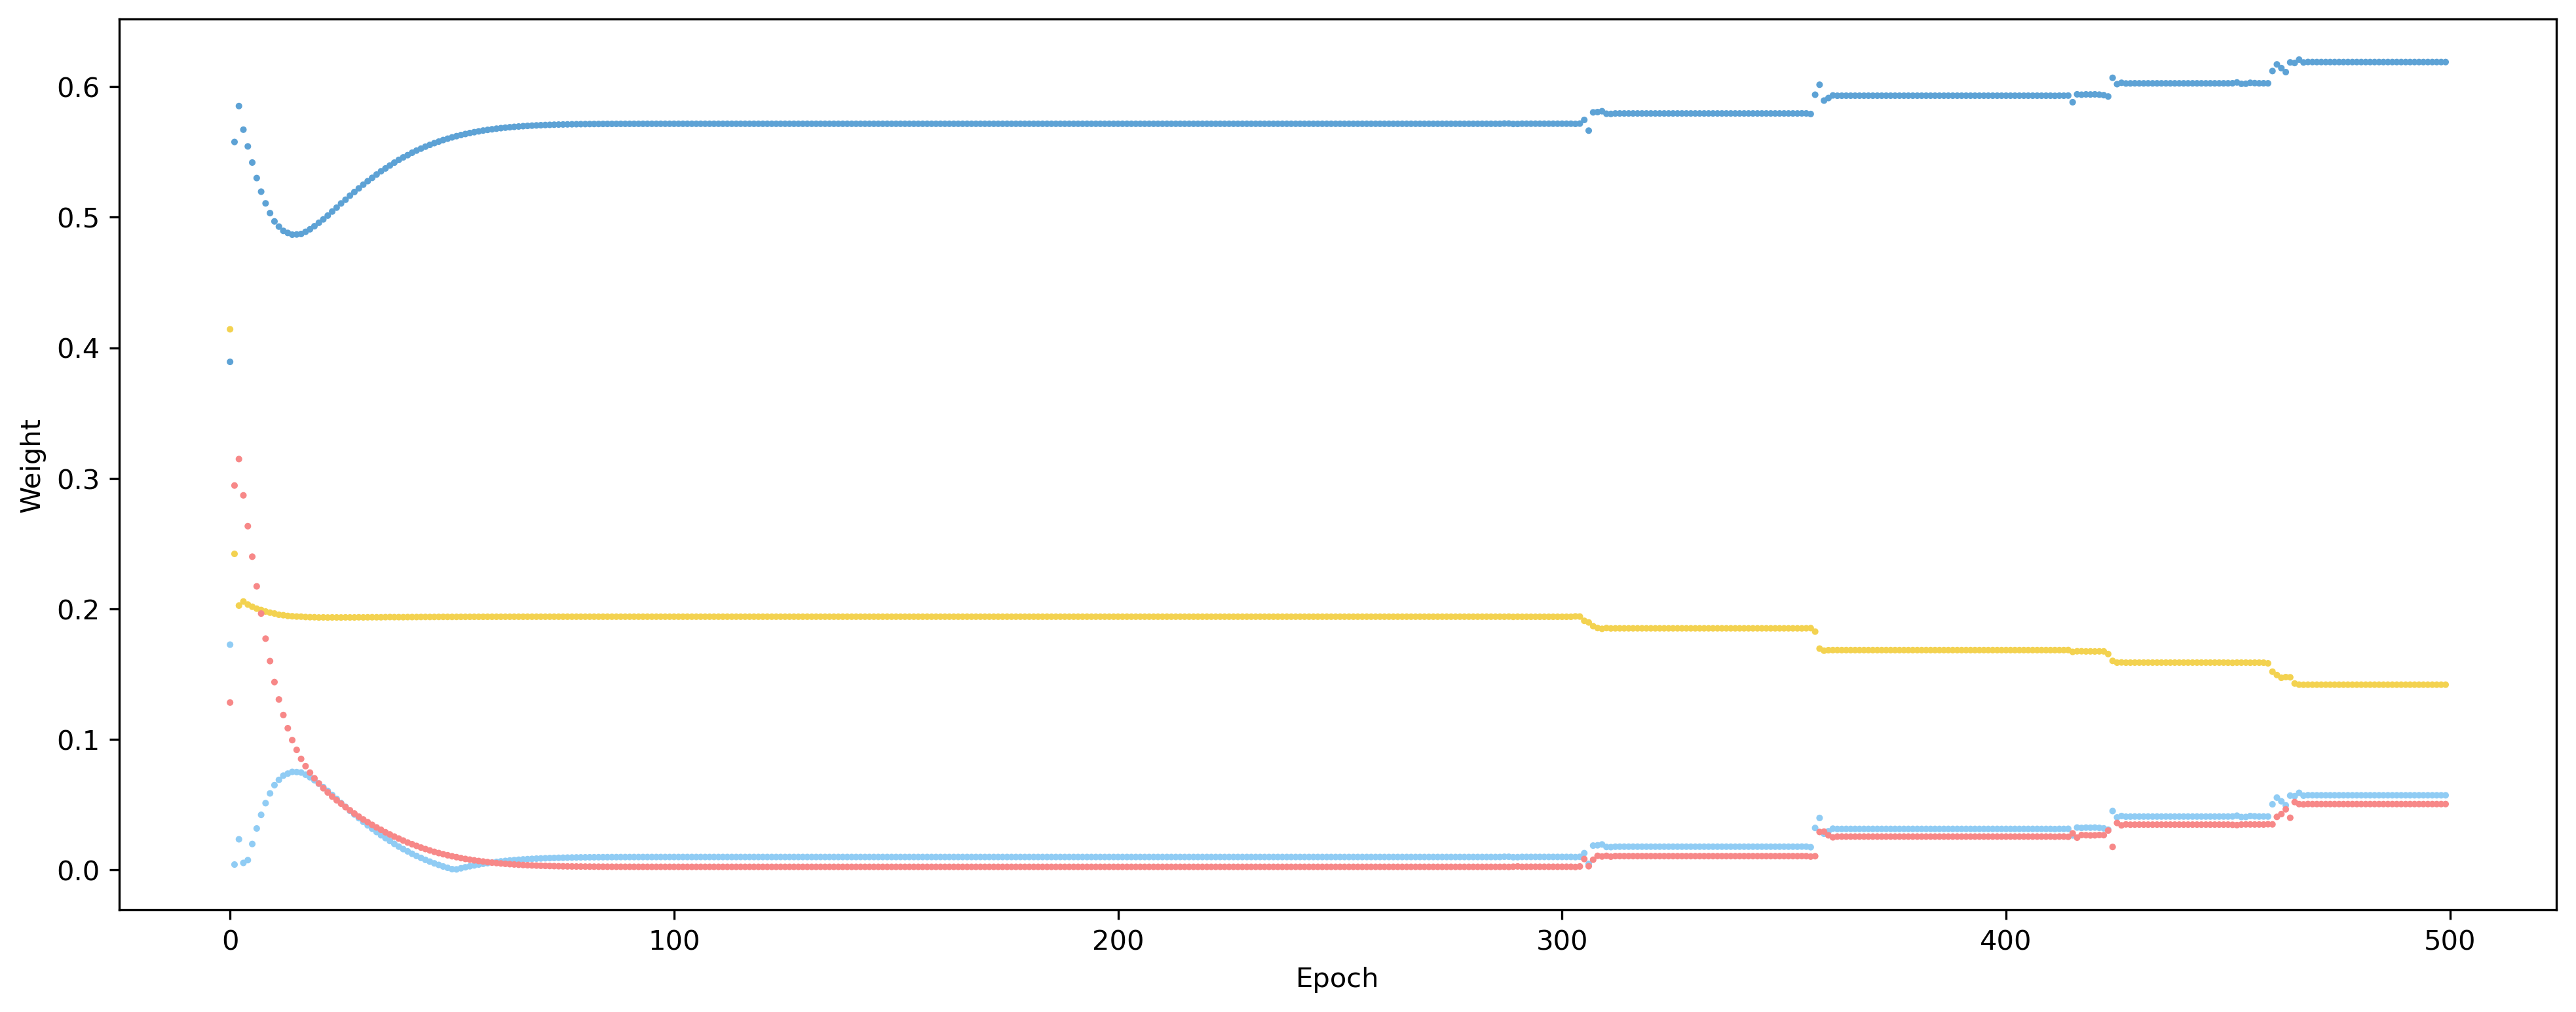

In [55]:
group_fours = [data["m_four"], data["x_four"], data["c_four"], data["noise_four"]]
sdf = call_prepare_scatter_df(group_fours, True)
create_scatter(sdf)

In [32]:
all_data = [ms, xs, cs, noises]

def get_lowest_number(data):
    lowest_number = 100
    for results in data:
        for group in results:
            for i in group:
                lowest_number = i if i < lowest_number else lowest_number
    return lowest_number

lowest_number = get_lowest_number(data)
print(lowest_number)


def adjust_all_values(data):
    return [[[i + abs(lowest_number) for i in group] for group in results] for results in data]


new_data = adjust_all_values(all_data)
print(len(new_data))

-1.4321445226669312
4


In [33]:
def add_numbers_together(data):
    new_data = []
    for input_column in data:
        new_results = [0 for _ in range(500)]
        for i, results in enumerate(input_column):
            for j, value in enumerate(input_column[i]):
                new_results[i] += input_column[i][j]
        new_data.append(new_results)
    return new_data

In [34]:
added = add_numbers_together(new_data)


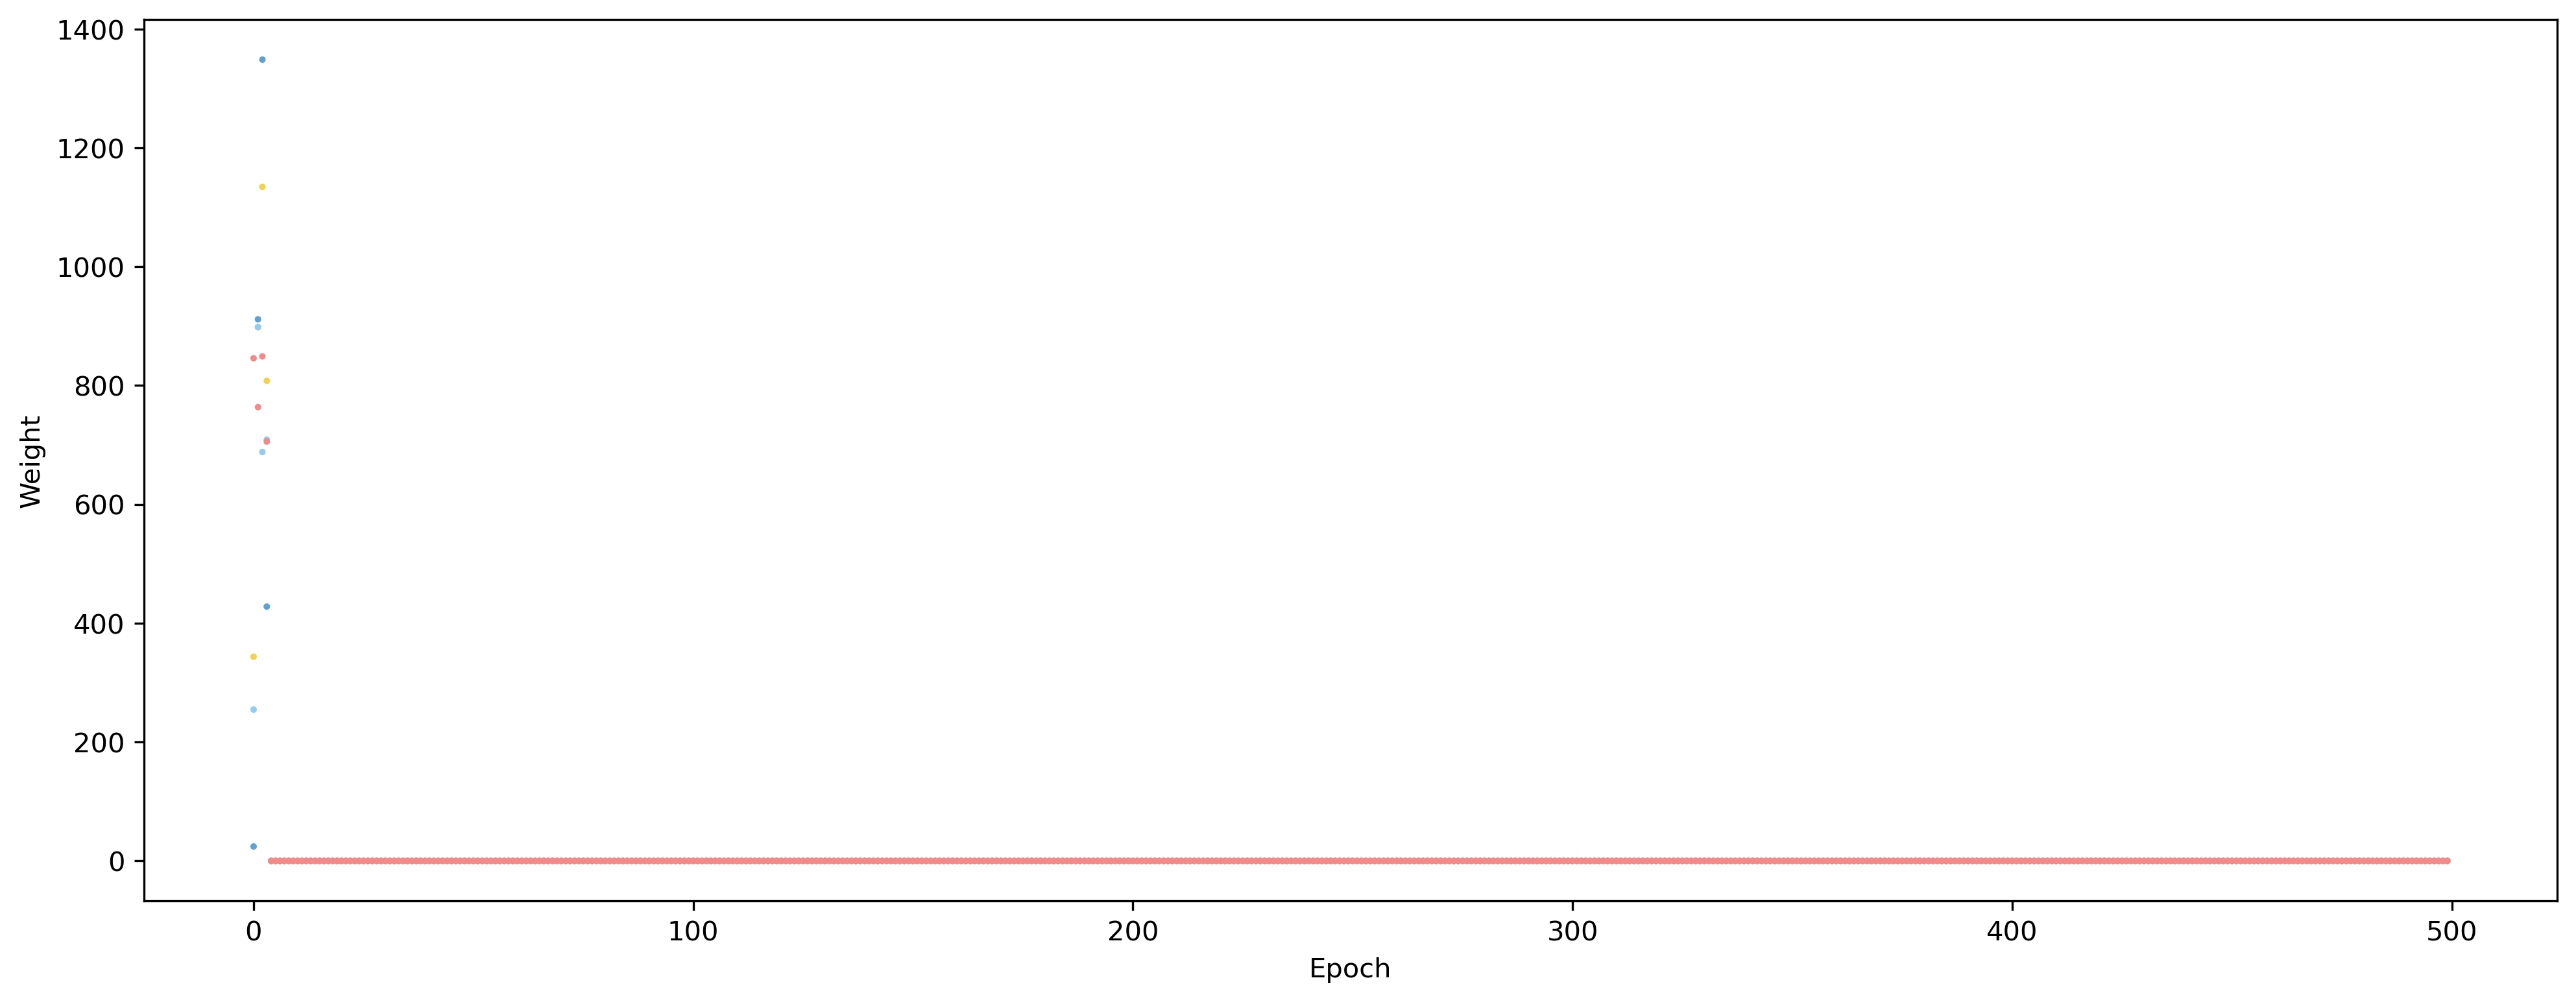

In [35]:
sdf = call_prepare_scatter_df(added)
create_scatter(sdf)